# 项目

目的：建立emotion、pre_cognition（可用pre_cognition_level分析）、rescource_difficulty与Promotion之间的关联模型，模型能够通过输入的emotion、pre_cognition、rescource_difficulty预测Promotion

## 读取数据

In [1]:
import pandas as pd

显示数据的前几行以了解其结构

In [2]:
data = pd.read_csv('re_modified_data.csv')

In [3]:
data.head()

,user_id,emotion,pre_cognition,pre_cognition_level,rescource,rescource_difficulty,post_cognition,promotion
0,1,0,0.2130,1,1,0,0.2839,0.0709
1,2,0,0.2155,1,1,0,0.2822,0.0667
2,3,0,0.2180,1,1,0,0.2805,0.0625
3,4,0,0.2195,1,1,0,0.2822,0.0627
4,5,0,0.2210,1,1,0,0.2838,0.0628


描述性统计分析

In [4]:
desc_stats = data.describe()
desc_stats

,user_id,emotion,pre_cognition,pre_cognition_level,rescource,rescource_difficulty,post_cognition,promotion
count,1146.00000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000,1146.000000
mean,573.50000,0.502618,0.515300,2.543630,2.997382,0.496510,0.622748,0.107448
std,330.96601,0.500211,0.200391,0.908148,1.413902,0.500206,0.208675,0.038964
min,1.00000,0.000000,0.201000,1.000000,1.000000,0.000000,0.250600,-0.018000
25%,287.25000,0.000000,0.335250,2.000000,2.000000,0.000000,0.429025,0.079425
50%,573.50000,1.000000,0.509000,3.000000,3.000000,0.000000,0.633450,0.107600
75%,859.75000,1.000000,0.680000,3.000000,4.000000,1.000000,0.828750,0.133900
max,1146.00000,1.000000,0.890000,4.000000,5.000000,1.000000,0.910000,0.208200


user_id：用户ID的范围从1到1146。  
emotion：情绪变量，0和1的比例接近，表示正面和负面情绪的比例接近。  
pre_cognition：初始认知水平的均值为0.5153，最小值为0.201，最大值为0.89。  
pre_cognition_level：初始认知水平的等级，均值为2.544，表示大多数人的初始认知水平处于中等偏上的水平。  
rescource：学习资源，均值接近3，表示大多数使用的是中等难度的学习资源。  
rescource_difficulty：学习资源的难度，0和1的比例接近，表示简单和困难资源的比例接近。  
post_cognition：学习后的认知水平，均值为0.6227，最小值为0.2506，最大值为0.91。  
promotion：认知水平的提升，均值为0.1074，最小值为-0.018，最大值为0.2082。  

接下来进行情绪、初始认知水平、学习资源难度与学习后认知水平之间的相关性分析

In [5]:
correlation = data.corr()
correlation['post_cognition']

user_id                 0.068518
emotion                 0.078021
pre_cognition           0.982667
pre_cognition_level     0.921763
rescource               0.006225
rescource_difficulty    0.039533
post_cognition          1.000000
promotion               0.301740
Name: post_cognition, dtype: float64

user_id：与学习后认知水平的关联性较弱，相关系数为0.0685。  
emotion：与学习后认知水平的关联性也较弱，相关系数为0.0780。  
pre_cognition：与学习后认知水平有很强的正相关关系，相关系数为0.9827。  
pre_cognition_level：与学习后认知水平有很强的正相关关系，相关系数为0.9218。  
rescource：与学习后认知水平的关联性很弱，相关系数为0.0062。  
rescource_difficulty：与学习后认知水平的关联性也很弱，相关系数为0.0395。  
promotion：与学习后认知水平有一定的正相关关系，相关系数为0.3017。  
从上述分析中，可以看到初始认知水平（pre_cognition）和初始认知水平的等级（pre_cognition_level）与学习后认知水平有很强的正相关关系。而情绪、学习资源和学习资源的难度与学习后认知水平的关联性较弱。

使用线性回归模型来建立情绪、初始认知水平、学习资源难度与学习后认知水平之间的关联模型。

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
X = data[['emotion', 'pre_cognition', 'rescource_difficulty']]
y = data['post_cognition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
mse

0.0009430250371310524

In [12]:
r2

0.9770028418682493

均方误差（MSE）：0.000943，这个值表示预测值与实际值之间的差异。MSE值越小，表示模型的预测越准确。  
决定系数（r2）：0.9770，这个值表示模型解释的变异性的比例。r2越接近1，表示模型的拟合效果越好。

可视化说明

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

实际值与预测值的散点图

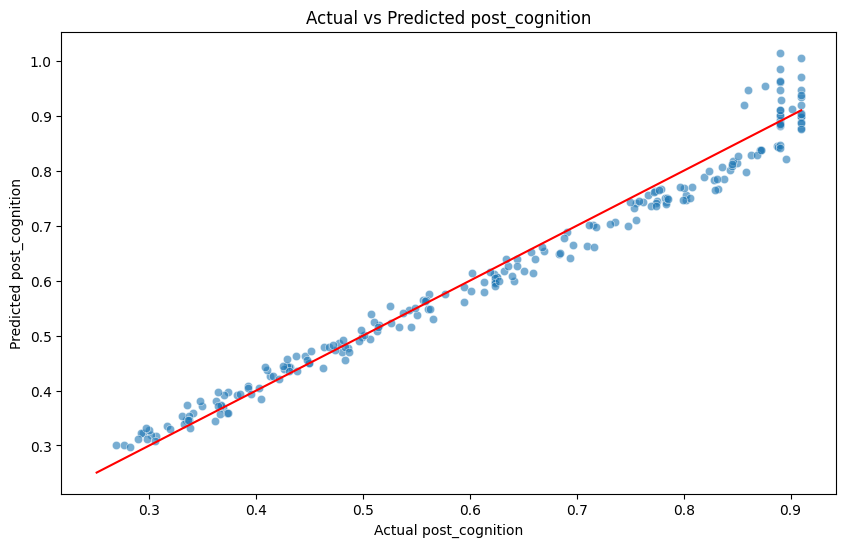

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual post_cognition')
plt.ylabel('Predicted post_cognition')
plt.title('Actual vs Predicted post_cognition')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # Diagonal line
plt.show()

残差图

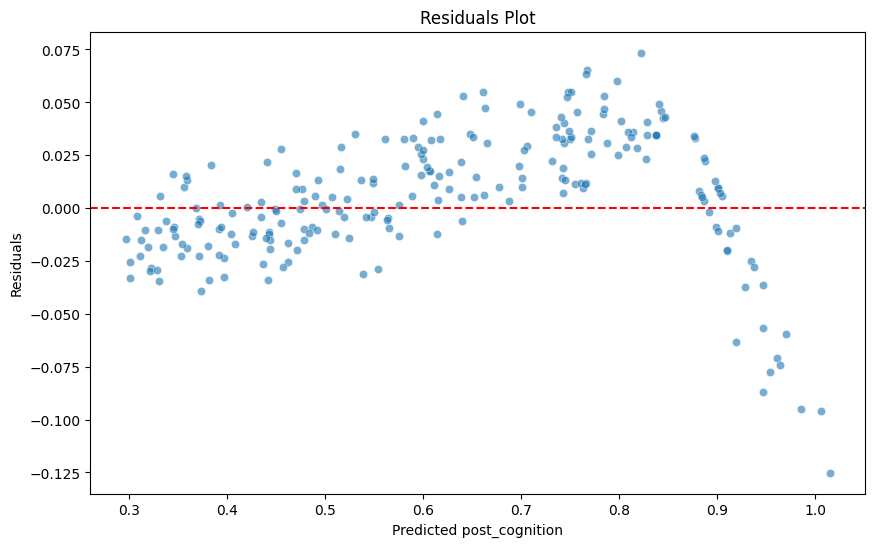

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.xlabel('Predicted post_cognition')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0
plt.show()

线性模型

In [16]:
coefficients = model.coef_
intercept = model.intercept_
coefficients, intercept

(array([0.03441474, 1.01971451, 0.01175724]), 0.07310796123863716)

（截距）：0.0731  
（情绪的系数）：1.0197  
（初始认知水平的系数）：0.0344  
（学习资源难度的系数）：0.0118  
模型的公式可以表示为：  
post_cognition=0.0731+1.0197×emotion+0.0344×pre_cognition+0.0118×rescource_difficulty